# Importing libraries and the dataset

In [2]:
#importing the python libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
import os

#importing/reading mushroom csv dataset
df = pd.read_csv("mushrooms.csv")





Examining the dataset to learn more about it:

# Examining the Data

In [3]:
# show the first 5 rows of the dataset
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# print info about the dataFrame,
# such as the index and column dtypes,
# non-null values, memory usage, etc.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Descriptive Statistics

In [5]:
# get statistics about the different columns

# count shows the number of responses
# unique shows the number of unique categorical values
# top shows the highest-occuring categorical value
# freq shows the frequency/ count of the highest-occuring categorical value

df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Showing the amount of mushrooms and unique features by displaying the shape of the dataset

df.shape returns the shape of the dataset, this shows us the amount of mushrooms sampled and the amount of features

Dataset shape: (instances of mushrooms, amount of features)

In [6]:
print("Dataset shape:", df.shape)


Dataset shape: (8124, 23)


Here we can see that there are 8124 instances of mushrooms with 23 features such as cap-shape, cap-surface, cap-color, bruises, odor, gill-size, etc.

# Show our classes by finding unique occurances of 'class' column

In [7]:
df['class'].unique()

array(['p', 'e'], dtype=object)

using the .unique() method, we can find all unique occurences in the class column of the dataset, which in this case would 'p' standing for poisonous and 'e' standing for edible.

# Finding the number of items in each class (edible or poisonous)


In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

using the .value_counts() method we can display a count of the unique occurences of each edible and poisonous class

We can see that there are 4208 occurences of edible mushrooms and 3916 occurences of poisonous ones.
This adds up to the 8124 total mushrooms in our dataset as shown by our dataset shape.

# Visualising the edible and poisonous mushroom count

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


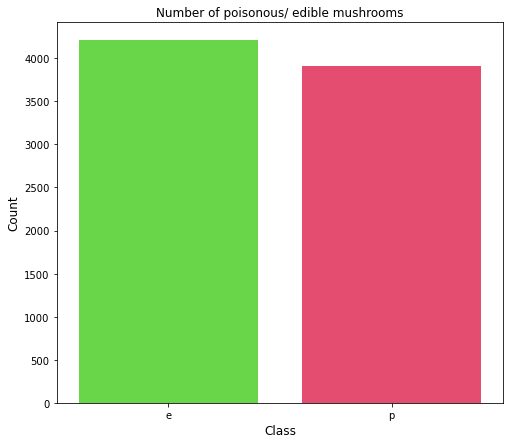

In [9]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index,count.values,alpha=0.8,palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/ edible mushrooms')
#code for saving image if required below
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

Visualising the data in this way confirms that the dataset is balanced
//FIND OUT WHY THIS IS IMPORTANT


# Data manipulation


Currently the data is categorical, meaning each feature is categorised by a name. We must use LabelEncoder to convert to ordinal feature catagories.
Using df.describe(), we could see that the columns are of "object" datatype.
To use LabelEncoder, the category column must be converted from the default non-numerical "object" datatype to the "category" datatype.


In [10]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

Now that the columns are of the type 'category', we can use LabelEncoder to convert each categorical value to ordinal values

In [11]:
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
    
#check the dataset again
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now we can see that all catagorical values have been converted to ordinal values, it is also clear that the column 'veil-type' is consistently 0 and therefore not contributing any value to the dataset, therefore we can consider removing it.
To further investigate this we can use df['veil-type']

In [12]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

It is now clear that the veil-type column is constantly 0, therefore we can delete it.

In [13]:
df = df.drop(['veil-type'],axis=1)

# Examining the characteristics of the data

A violin plot is a type of categorical distribution plot. Using a violin plot allows us to see a graphical representation of the classification characteristics.


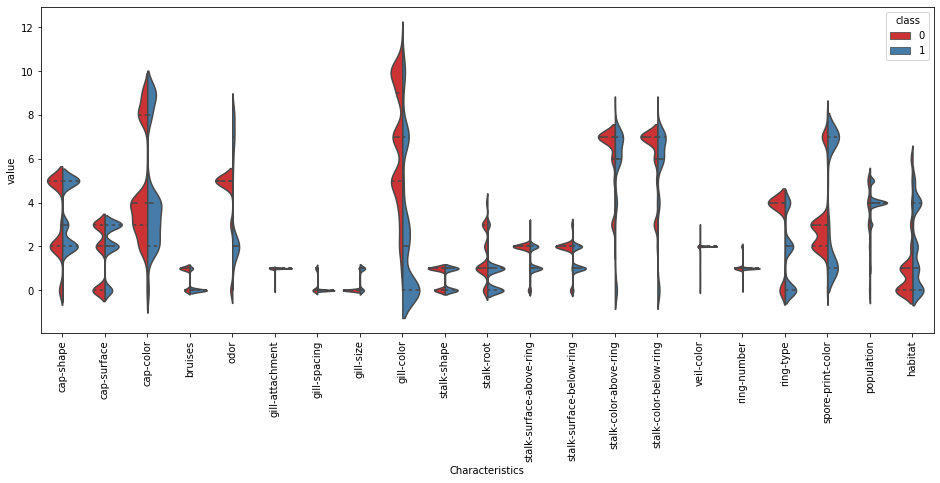

In [14]:
df_div = pd.melt(df,"class", var_name="Characteristics")
fig, ax = plt.subplots(figsize = (16,6))

p = sns.violinplot(ax = ax, x = "Characteristics", y = "value", hue = "class", split = True, data = df_div,
                  inner = 'quartile', palette = 'Set1')

df_no_class = df.drop(["class"],axis = 1)

p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

#optional code for saving graph
#plt.savefig("violinplot.png", format='png', dpi=500, bbox_inches='tight')

Here we can see the split in values for poisonous (1) and edible (0).

It is obvious from the diagram that "gill-color" has the greatest split split of values, with most the poisonous mushrooms having a gill colour value under approximately 3.5, and most the edible mushrooms having a value of over approximately 3.5.

This tells us that gill-colour is perhaps the most important(although not only) indicator of whether or not a mushroom is going to be poisonous or not.

# Analysing correlation between variables

A heatmap displays the correlation between all of our features.

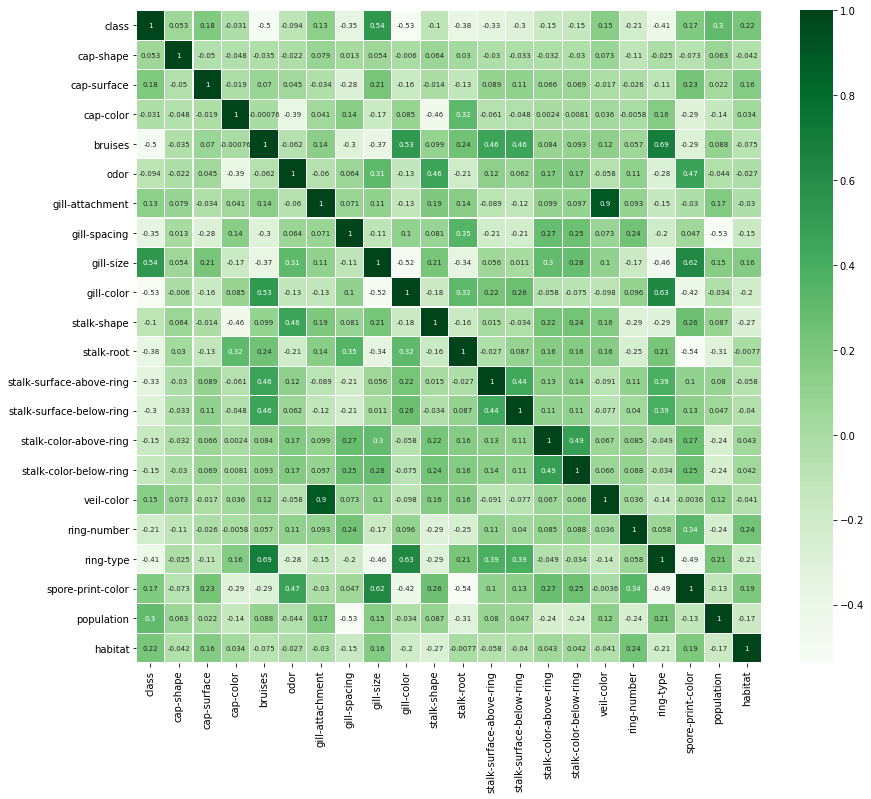

In [15]:
plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidth=.1,cmap="Greens", annot=True, annot_kws={"size": 7})

plt.yticks(rotation=0);

#optional code for saving heatmap
#plt.savefig("corr.png", format='png',dpi=400, bbox_inches='tight')

The most important features to be used in recognition are going to be the ones that are most negatively correlated with the 'edible' and 'poisonous' classes.

In this case, we can see that the most negatively correlated feature to class would be "gill-color", which has a value of -0.53
#find out why it is the negative correlation as opposed to the positive correlation

We can also create a bar chart that further shows the number of edible and poisonous mushrooms for each gill-color value.
From our previous analyis of the violin chart, we could see the majority of mushrooms with gill-color value of greater than 3.5 where edible, and those with a value of less than 3.5 where poisonous.
Therefore to make things clearer, I will create a different graphic for values above and below 3.5.

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


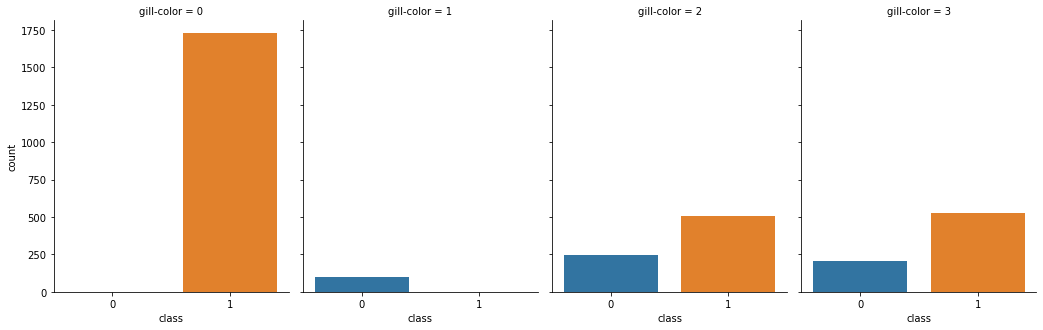

In [16]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#optional code for saving bar charts
#plt.savefig("gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


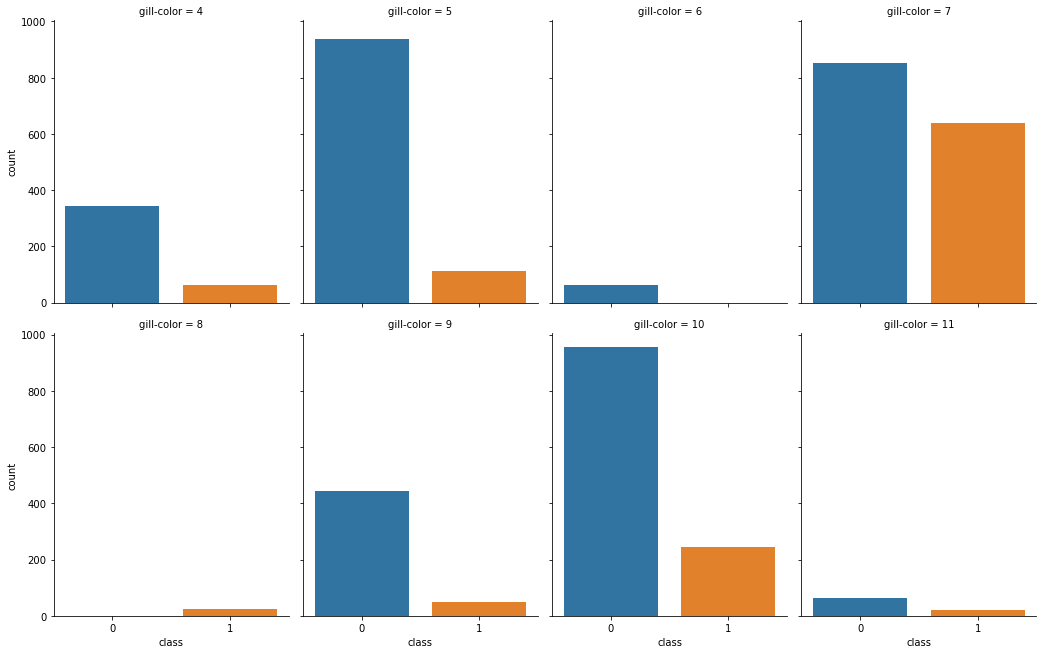

In [17]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#optional code for saving bar charts
#plt.savefig("gillcolor2.png", format='png', dpi=400, bbox_inches='tight')

The above data is just a more precise representation of the gill-color section data visible on the violin graph.

# Preparing the data

In [18]:
X = df.drop(['class'], axis=1)

y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

X and Y axis is split and the 'class' column is dropped, as the aim is to predict the class.

# Classification:

# 1. Decision Tree 

[Text(445.32692307692304, 815.4, 'gill-color <= 3.5\ngini = 0.499\nsamples = 7311\nvalue = [3775, 3536]'),
 Text(214.61538461538458, 706.6800000000001, 'population <= 3.5\ngini = 0.275\nsamples = 2971\nvalue = [488, 2483]'),
 Text(85.84615384615384, 597.96, 'spore-print-color <= 1.5\ngini = 0.223\nsamples = 525\nvalue = [458, 67]'),
 Text(42.92307692307692, 489.24, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(128.76923076923077, 489.24, 'gill-size <= 0.5\ngini = 0.087\nsamples = 480\nvalue = [458, 22]'),
 Text(85.84615384615384, 380.52, 'gini = 0.0\nsamples = 458\nvalue = [458, 0]'),
 Text(171.69230769230768, 380.52, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(343.38461538461536, 597.96, 'stalk-root <= 2.0\ngini = 0.024\nsamples = 2446\nvalue = [30, 2416]'),
 Text(300.46153846153845, 489.24, 'stalk-surface-below-ring <= 0.5\ngini = 0.009\nsamples = 2427\nvalue = [11, 2416]'),
 Text(257.53846153846155, 380.52, 'gill-size <= 0.5\ngini = 0.444\nsamples = 33\nvalue = [11, 22

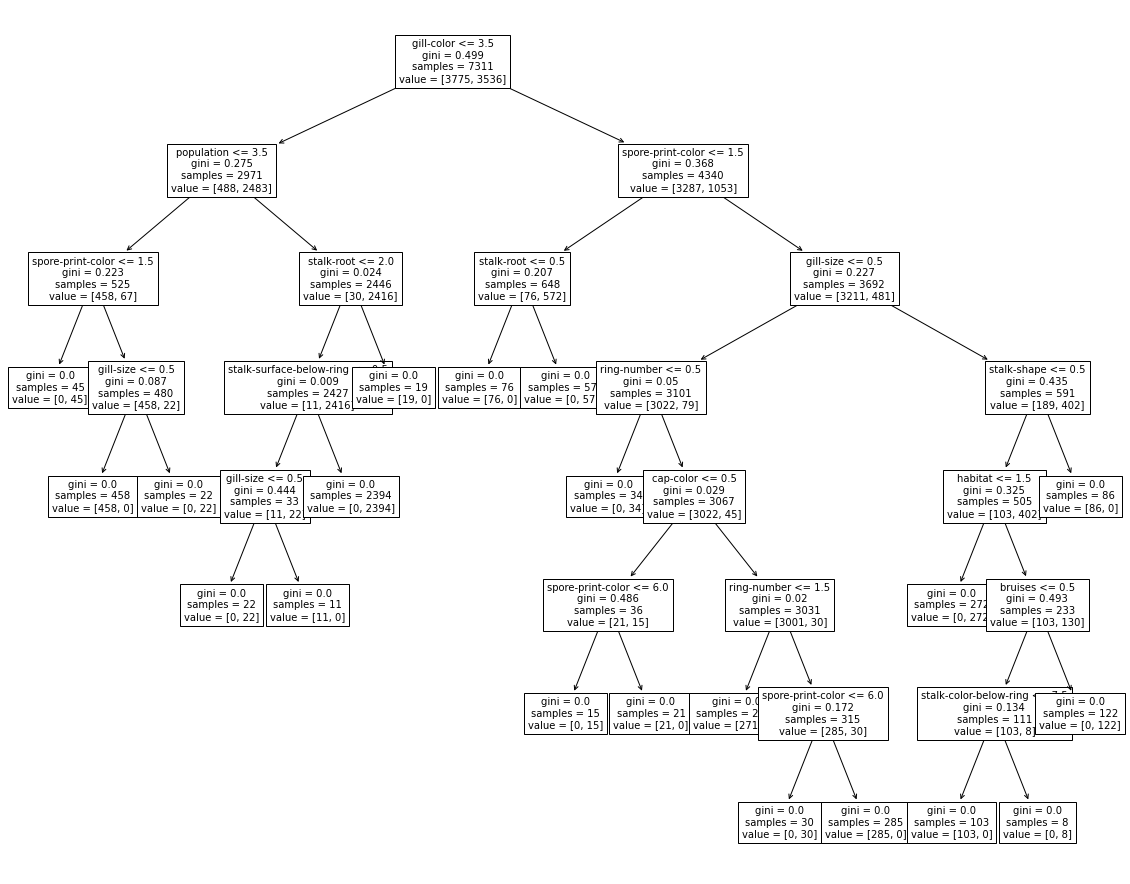

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

features_list = X.columns.values
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
#feature_name = X_train[X]


#tree.plot_tree(dt) 
# plot tree
plt.figure(figsize=(20,16))# set plot size (denoted in inches)
tree.plot_tree(dt,fontsize=10, feature_names= features_list)


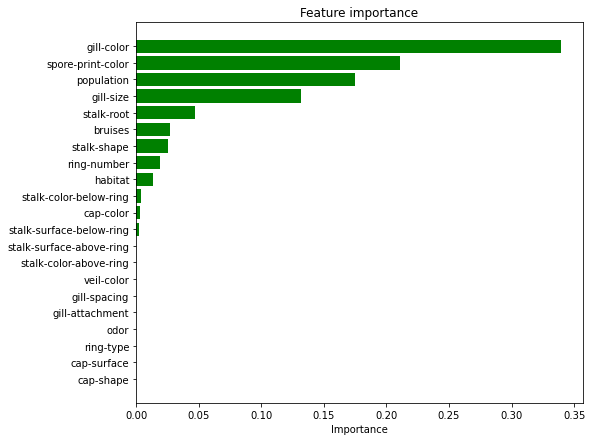

In [20]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="green")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# Predicting and estimating the result



In [21]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


# Decision Tree Confusion Matrix

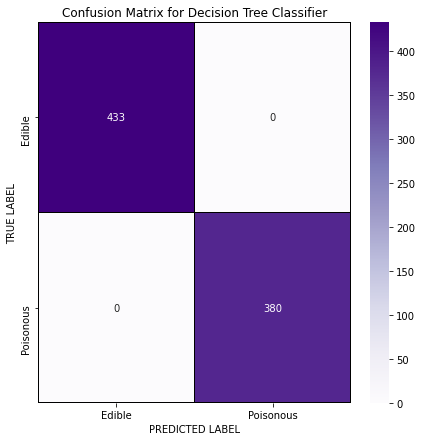

In [22]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Here we can see that all of the predicted edible and poisonous mushrooms where correctly identified.

# Neural Net

In [30]:
from sklearn.neural_network import MLPClassifier


features_list = X.columns.values
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(35,3), random_state=1)
nn.fit(X_train, y_train)
#feature_name = X_train[X]

y_pred_nn = nn.predict(X_test)
print("Neural Net report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(nn.score(X_test, y_test)*100, 2)))

#tree.plot_tree(dt) 
# plot tree
#plt.figure(figsize=(20,16))# set plot size (denoted in inches)
#tree.plot_tree(dt,fontsize=10, feature_names= features_list)



Neural Net report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%
